In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from pylab import savefig
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)
import os

In [2]:
df = pd.read_csv('anonChurn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24513 entries, 0 to 24512
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RecordID            24513 non-null  int64  
 1   d_1                 24513 non-null  int64  
 2   d_15                24513 non-null  int64  
 3   d_16                18582 non-null  float64
 4   d_2                 24513 non-null  int64  
 5   d_20                19927 non-null  float64
 6   d_21                23239 non-null  float64
 7   d_3                 21866 non-null  float64
 8   d_4                 22588 non-null  float64
 9   d_5                 21872 non-null  float64
 10  d_6                 24513 non-null  int64  
 11  d_7                 22308 non-null  float64
 12  d_8                 19283 non-null  float64
 13  Intention_to_leave  24513 non-null  int64  
 14  q_10                24513 non-null  int64  
 15  q_11                24513 non-null  int64  
 16  q_12

In [4]:
df.head(3)

,RecordID,d_1,d_15,d_16,d_2,d_20,d_21,d_3,d_4,d_5,d_6,d_7,d_8,Intention_to_leave,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,q_2,q_20,q_21,q_22,q_23,q_24,q_25,q_26,q_27,q_28,q_29,q_3,q_30,q_31,q_32,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_4,q_40,q_41,q_42,q_43,q_44,q_45,q_46,q_47,q_48,q_49,q_5,q_50,q_51,q_52,q_53,q_54,q_55,q_6,q_7,q_8,q_9
0,1,3,2,4.0,1,NaN,5.0,2.0,2.0,1.0,1,1.0,NaN,0,1,2,2,1,2,1,1,2,1,5,1,4,2,2,4,4,3,3,2,NaN,NaN,1,NaN,NaN,NaN,2,3,3,1,4,1,3,2,2,1,1,1,2,1,1,1,1,1,1,1,2,3,2,1,3,2,1,3,1
1,10,3,5,4.0,1,NaN,1.0,2.0,2.0,16.0,1,2.0,1.0,0,1,1,2,1,1,2,2,5,1,1,1,2,1,2,1,2,1,1,1,NaN,NaN,1,NaN,NaN,NaN,1,1,5,2,2,2,1,1,1,1,1,1,2,1,3,1,1,2,1,1,1,2,1,2,4,2,2,2,1
2,100,3,3,4.0,1,NaN,2.0,2.0,NaN,10.0,1,1.0,1.0,1,5,1,1,1,1,1,4,2,1,2,2,2,2,2,3,2,2,2,1,NaN,NaN,1,NaN,NaN,NaN,2,2,5,2,1,4,2,1,4,3,2,1,2,1,5,2,2,1,1,1,2,2,1,5,5,2,2,4,1


In [5]:
df.shape

(24513, 68)

In [6]:
df.describe()

,RecordID,d_1,d_15,d_16,d_2,d_20,d_21,d_3,d_4,d_5,d_6,d_7,d_8,Intention_to_leave,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,q_2,q_20,q_21,q_22,q_23,q_24,q_25,q_26,q_27,q_28,q_29,q_3,q_30,q_31,q_32,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_4,q_40,q_41,q_42,q_43,q_44,q_45,q_46,q_47,q_48,q_49,q_5,q_50,q_51,q_52,q_53,q_54,q_55,q_6,q_7,q_8,q_9
count,24513.00000,24513.000000,24513.000000,18582.000000,24513.000000,19927.000000,23239.000000,21866.000000,22588.000000,21872.000000,24513.000000,22308.000000,19283.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.00000,24513.000000,24513.000000,24513.00000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,8496.000000,8496.000000,24513.000000,8496.000000,8496.000000,8496.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000,24513.000000
mean,12257.00000,3.465630,3.439155,3.780433,1.176519,12.139459,2.072163,1.798088,1.939835,2.593087,1.650104,1.602385,1.160712,0.396402,2.294334,2.193367,2.275038,1.870110,2.158120,2.050708,2.143801,2.325827,2.094929,2.247501,1.51593,2.072696,2.184066,2.00926,2.060376,1.920042,2.057072,1.929670,2.087586,2.159605,2.216102,1.431445,2.315207,2.310146,2.328272,1.763840,2.027006,2.050381,2.086199,1.834455,1.972708,1.686778,1.991596,2.127891,1.994452,2.088076,1.835638,1.963938,2.350997,2.062293,2.075062,1.822462,2.087382,1.662098,2.527271,1.987394,2.113287,2.121609,2.278016,2.523477,2.048954,2.063028,3.038388,1.637825
std,7076.43791,1.428811,1.976666,0.746200,0.386582,10.771982,1.136633,0.404161,0.241308,3.618889,0.480950,0.585886,0.487738,0.489160,1.392284,1.316654,1.277499,1.217804,1.316246,1.201914,1.374749,1.340744,1.309892,1.334901,0.83709,1.174454,1.316562,1.16196,1.060980,1.180359,1.281986,1.297604,1.344061,1.330477,1.239588,0.720114,1.308454,1.315447,1.376394,1.086798,1.267117,1.225490,1.257076,1.092757,1.154278,1.035615,1.210712,1.211079,1.165752,1.305630,1.165674,1.226943,1.427851,1.239082,1.258617,1.163687,1.337731,0.964703,1.472856,1.314478,1.328022,1.302965,1.371544,1.430202,1.167011,1.166248,1.516243,1.022324
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6129.00000,2.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,12257.00000,3.000000,3.000000,4.000000,1.000000,7.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000

In [7]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24513 entries, 0 to 24512
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RecordID            24513 non-null  int64  
 1   d_1                 24513 non-null  int64  
 2   d_15                24513 non-null  int64  
 3   d_16                18582 non-null  float64
 4   d_2                 24513 non-null  int64  
 5   d_20                19927 non-null  float64
 6   d_21                23239 non-null  float64
 7   d_3                 21866 non-null  float64
 8   d_4                 22588 non-null  float64
 9   d_5                 21872 non-null  float64
 10  d_6                 24513 non-null  int64  
 11  d_7                 22308 non-null  float64
 12  d_8                 19283 non-null  float64
 13  Intention_to_leave  24513 non-null  int64  
 14  q_10                24513 non-null  int64  
 15  q_11                24513 non-null  int64  
 16  q_12

### Variables who has missing values

In [8]:
# List of variables with missing values
more_than_0 ={}
dict_val = round(df.isna().mean()*100,2).to_dict()

for i, j in dict_val.items():
    if j>0:
        more_than_0[i] = j
more_than_0

{'d_16': 24.2,
 'd_20': 18.71,
 'd_21': 5.2,
 'd_3': 10.8,
 'd_4': 7.85,
 'd_5': 10.77,
 'd_7': 9.0,
 'd_8': 21.34,
 'q_28': 65.34,
 'q_29': 65.34,
 'q_30': 65.34,
 'q_31': 65.34,
 'q_32': 65.34}

### Finding out columns with more than 40% null values

In [9]:
list(round(df.isna().mean()[round(df.isna().mean()*100,2)>40]*100,2).to_dict().keys())

['q_28', 'q_29', 'q_30', 'q_31', 'q_32']

### Dropping columns with more than 40% of missing values

In [10]:
df_new = df.drop(['q_28', 'q_29', 'q_30', 'q_31', 'q_32'], axis =1)

In [11]:
df_new.shape

(24513, 63)

In [12]:
round(df_new.isna().mean()[round(df_new.isna().mean()*100,2)>10]*100,2)

d_16    24.20
d_20    18.71
d_3     10.80
d_5     10.77
d_8     21.34
dtype: float64

#### imputing null values of d_16 with the most occured value

In [13]:
df_new['d_16'].value_counts().sort_values(ascending=False)

4.0    16945
1.0      895
2.0      410
3.0      251
0.0       81
Name: d_16, dtype: int64

In [14]:
list(df_new['d_16'].mode())[0]

4.0

In [15]:
df_new['d_16'] = df_new['d_16'].replace(np.nan, list(df_new['d_16'].mode())[0])

#### imputing null values of d_20 with the most occured value

In [16]:
df_new['d_20'].value_counts().sort_values(ascending=False)

6.0     4328
7.0     3081
26.0    2498
1.0     2394
25.0    2190
4.0     1179
2.0     1016
8.0      859
34.0     646
3.0      555
30.0     361
27.0     297
29.0     160
33.0     153
32.0      83
31.0      54
28.0      40
40.0      19
0.0        7
36.0       3
44.0       3
39.0       1
Name: d_20, dtype: int64

In [17]:
df_new['d_20'] = df_new['d_20'].replace(np.nan, list(df_new['d_20'].mode())[0])

#### imputing null values of d_3 with the most occured value

In [18]:
df_new['d_3'].value_counts().sort_values(ascending=False)

2.0    17475
1.0     4367
0.0       24
Name: d_3, dtype: int64

In [19]:
df_new['d_3'] = df_new['d_3'].replace(np.nan, list(df_new['d_3'].mode())[0])

#### imputing null values of d_5 with the most occured value

In [20]:
df_new['d_5'].value_counts().sort_values(ascending=False)

1.0     17283
9.0       830
4.0       594
2.0       545
11.0      541
14.0      411
10.0      376
13.0      315
12.0      255
5.0       167
8.0       125
15.0      109
7.0       107
6.0        79
16.0       74
0.0        61
Name: d_5, dtype: int64

In [21]:
df_new['d_5'] = df_new['d_5'].replace(np.nan, list(df_new['d_5'].mode())[0])

#### imputing null values of d_8 with the most occured value

In [22]:
df_new['d_8'].value_counts().sort_values(ascending=False)

1.0    17100
2.0     1332
3.0      778
4.0       71
0.0        2
Name: d_8, dtype: int64

In [23]:
df_new['d_8'] = df_new['d_8'].replace(np.nan, list(df_new['d_8'].mode())[0])

### Checking all other null columns

In [24]:
df_new.isna().sum()[df_new.isna().sum()>0]

d_21    1274
d_4     1925
d_7     2205
dtype: int64

### Dropping datpoints containing null valus for each column containg null values less than 10%

In [25]:
#Checking the shape of the new dataframe before dropping the null values
df_new.shape

(24513, 63)

In [26]:
df_new = df_new.dropna()
df_new.shape

(20826, 63)

#### checking if any null values are there in the dataframe

In [27]:
df_new.isna().sum()[df_new.isna().sum()>0]

Series([], dtype: int64)

In [28]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
df_new.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,RecordID,d_1,d_15,d_16,d_2,d_20,d_21,d_3,d_4,d_5,d_6,d_7,d_8,Intention_to_leave,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,q_2,q_20,q_21,q_22,q_23,q_24,q_25,q_26,q_27,q_3,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_4,q_40,q_41,q_42,q_43,q_44,q_45,q_46,q_47,q_48,q_49,q_5,q_50,q_51,q_52,q_53,q_54,q_55,q_6,q_7,q_8,q_9
count,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000,20826.000000
mean,12203.588831,3.460050,3.380150,3.825843,1.184865,11.223855,2.053251,1.815519,1.940315,2.551570,1.653894,1.593009,1.129502,0.363008,2.182032,2.117689,2.196437,1.799193,2.066503,1.964756,2.071305,2.218813,1.990877,2.133151,1.470085,1.991309,2.072073,1.930375,1.986699,1.830932,1.954000,1.839864,1.988764,1.402142,1.685681,1.931768,1.965140,1.999232,1.758379,1.886536,1.627581,1.897292,2.029626,1.926342,1.979737,1.743158,1.869442,2.254153,1.968213,1.981946,1.734995,1.988668,1.608518,2.427398,1.884759,2.015605,2.019159,2.176702,2.431240,1.964083,1.977336,2.932152,1.560933
std,7086.606060,1.422428,1.978338,0.670322,0.393602,10.127605,1.126990,0.389984,0.239729,3.577045,0.477351,0.564425,0.443696,0.480879,1.347140,1.285631,1.243536,1.174320,1.276529,1.157846,1.346751,1.299956,1.249793,1.285878,0.794575,1.131698,1.265572,1.118759,1.050406,1.128730,1.227143,1.242446,1.292389,0.693688,1.029096,1.215507,1.179348,1.212460,1.042072,1.103239,0.985014,1.161638,1.162659,1.149498,1.248316,1.103941,1.172023,1.394411,1.189327,1.211454,1.102838,1.289375,0.924087,1.447484,1.254225,1.280080,1.247198,1.331090,1.405973,1.124882,1.123562,1.505351,0.955911
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6068.250000,2.000000,2.000000,4.000000,1.000000,6.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
50%,12164.500000,3.000000,3.000000,4.000000,1.000000,6.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.0

In [29]:
df_new.head()

,RecordID,d_1,d_15,d_16,d_2,d_20,d_21,d_3,d_4,d_5,d_6,d_7,d_8,Intention_to_leave,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,q_2,q_20,q_21,q_22,q_23,q_24,q_25,q_26,q_27,q_3,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_4,q_40,q_41,q_42,q_43,q_44,q_45,q_46,q_47,q_48,q_49,q_5,q_50,q_51,q_52,q_53,q_54,q_55,q_6,q_7,q_8,q_9
0,1,3,2,4.0,1,6.0,5.0,2.0,2.0,1.0,1,1.0,1.0,0,1,2,2,1,2,1,1,2,1,5,1,4,2,2,4,4,3,3,2,1,2,3,3,1,4,1,3,2,2,1,1,1,2,1,1,1,1,1,1,1,2,3,2,1,3,2,1,3,1
1,10,3,5,4.0,1,6.0,1.0,2.0,2.0,16.0,1,2.0,1.0,0,1,1,2,1,1,2,2,5,1,1,1,2,1,2,1,2,1,1,1,1,1,1,5,2,2,2,1,1,1,1,1,1,2,1,3,1,1,2,1,1,1,2,1,2,4,2,2,2,1
3,1000,3,6,4.0,1,25.0,1.0,2.0,2.0,1.0,1,1.0,3.0,0,1,1,4,1,2,5,5,2,1,2,1,1,1,4,2,1,1,1,2,2,2,1,1,1,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,4,1
5,10001,3,2,4.0,1,6.0,2.0,2.0,2.0,1.0,1,1.0,1.0,1,4,4,3,1,1,4,5,3,4,4,1,4,4,1,3,2,1,2,2,3,3,1,4,4,4,4,1,5,4,4,3,1,1,4,3,4,2,4,5,5,2,1,4,4,3,5,4,4,3
6,10002,5,5,4.0,1,6.0,3.0,2.0,2.0,1.0,2,2.0,1.0,1,2,1,1,1,1,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,2,2,2,1,1,2,1,1,1,1,1,2,2,2,1,2,1,2


In [30]:
df_final = df_new.drop('RecordID', axis = 1)

In [31]:
df_final.head()

,d_1,d_15,d_16,d_2,d_20,d_21,d_3,d_4,d_5,d_6,d_7,d_8,Intention_to_leave,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,q_2,q_20,q_21,q_22,q_23,q_24,q_25,q_26,q_27,q_3,q_33,q_34,q_35,q_36,q_37,q_38,q_39,q_4,q_40,q_41,q_42,q_43,q_44,q_45,q_46,q_47,q_48,q_49,q_5,q_50,q_51,q_52,q_53,q_54,q_55,q_6,q_7,q_8,q_9
0,3,2,4.0,1,6.0,5.0,2.0,2.0,1.0,1,1.0,1.0,0,1,2,2,1,2,1,1,2,1,5,1,4,2,2,4,4,3,3,2,1,2,3,3,1,4,1,3,2,2,1,1,1,2,1,1,1,1,1,1,1,2,3,2,1,3,2,1,3,1
1,3,5,4.0,1,6.0,1.0,2.0,2.0,16.0,1,2.0,1.0,0,1,1,2,1,1,2,2,5,1,1,1,2,1,2,1,2,1,1,1,1,1,1,5,2,2,2,1,1,1,1,1,1,2,1,3,1,1,2,1,1,1,2,1,2,4,2,2,2,1
3,3,6,4.0,1,25.0,1.0,2.0,2.0,1.0,1,1.0,3.0,0,1,1,4,1,2,5,5,2,1,2,1,1,1,4,2,1,1,1,2,2,2,1,1,1,2,2,1,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,4,1
5,3,2,4.0,1,6.0,2.0,2.0,2.0,1.0,1,1.0,1.0,1,4,4,3,1,1,4,5,3,4,4,1,4,4,1,3,2,1,2,2,3,3,1,4,4,4,4,1,5,4,4,3,1,1,4,3,4,2,4,5,5,2,1,4,4,3,5,4,4,3
6,5,5,4.0,1,6.0,3.0,2.0,2.0,1.0,2,2.0,1.0,1,2,1,1,1,1,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,1,2,1,1,1,1,1,2,2,2,1,2,2,2,1,1,2,1,1,1,1,1,2,2,2,1,2,1,2


In [32]:
len(df_final.columns)

62

In [33]:
df_final.shape

(20826, 62)

### Checking the distribution of few variables

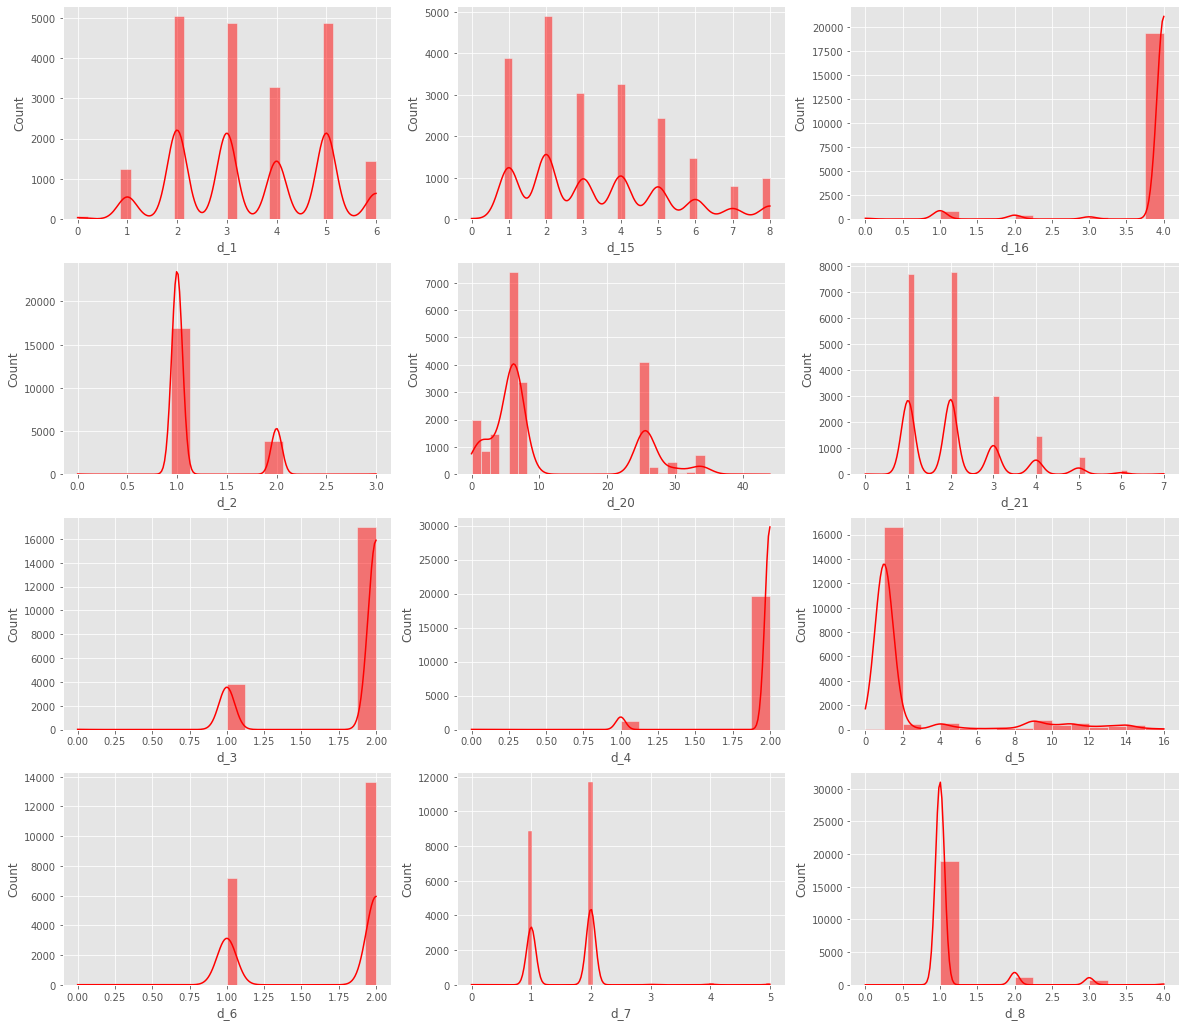

In [34]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 18))

plt.subplot(4,3,1)
sns.histplot(df_final['d_1'], kde = True, color = 'red')

plt.subplot(4,3,2)
sns.histplot(df_final['d_15'], kde = True, color = 'red')

plt.subplot(4,3,3)
sns.histplot(df_final['d_16'], kde = True, color = 'red')

plt.subplot(4,3,4)
sns.histplot(df_final['d_2'], kde = True, color = 'red')

plt.subplot(4,3,5)
sns.histplot(df_final['d_20'], kde = True, color = 'red')

plt.subplot(4,3,6)
sns.histplot(df_final['d_21'], kde = True, color = 'red')

plt.subplot(4,3,7)
sns.histplot(df_final['d_3'], kde = True, color = 'red')

plt.subplot(4,3,8)
sns.histplot(df_final['d_4'], kde = True, color = 'red')

plt.subplot(4,3,9)
sns.histplot(df_final['d_5'], kde = True, color = 'red')

plt.subplot(4,3,10)
sns.histplot(df_final['d_6'], kde = True, color = 'red')

plt.subplot(4,3,11)
sns.histplot(df_final['d_7'], kde = True, color = 'red')

plt.subplot(4,3,12)
sns.histplot(df_final['d_8'], kde = True, color = 'red')
plt.show()

<html><h3> From the above chart we can see that here are clerly some anomaly in the distribution of the data in few of the columns ad the mos effected columns are <font color="Red"><i>'d_16', 'd_3', 'd_4', 'd_5', 'd_7' & 'd_8'</i></font></h3></html>

### Checking the maximum, minimum, mode  and mean value of all the columns

In [35]:
for i in list(df_final.drop('Intention_to_leave', axis = 1).columns):
    print('For Colum    '+ str(i) +'    Maximum Value = '+ str(max(df_final[i]))
          + '      Minimum Value = '+ str(min(df_final[i]))
          + '      Mean Value = ' + str(round(df_final[i].mean(),2))
          + '      Mode Value = '+ str(list(df_final[i].mode())[0]))

For Colum    d_1    Maximum Value = 6      Minimum Value = 0      Mean Value = 3.46      Mode Value = 2
For Colum    d_15    Maximum Value = 8      Minimum Value = 0      Mean Value = 3.38      Mode Value = 2
For Colum    d_16    Maximum Value = 4.0      Minimum Value = 0.0      Mean Value = 3.83      Mode Value = 4.0
For Colum    d_2    Maximum Value = 3      Minimum Value = 0      Mean Value = 1.18      Mode Value = 1
For Colum    d_20    Maximum Value = 44.0      Minimum Value = 0.0      Mean Value = 11.22      Mode Value = 6.0
For Colum    d_21    Maximum Value = 7.0      Minimum Value = 0.0      Mean Value = 2.05      Mode Value = 2.0
For Colum    d_3    Maximum Value = 2.0      Minimum Value = 0.0      Mean Value = 1.82      Mode Value = 2.0
For Colum    d_4    Maximum Value = 2.0      Minimum Value = 0.0      Mean Value = 1.94      Mode Value = 2.0
For Colum    d_5    Maximum Value = 16.0      Minimum Value = 0.0      Mean Value = 2.55      Mode Value = 1.0
For Colum    d_6    M

#### Fetching columns with maximum value more than 10

In [36]:
[i for i in df_final.drop('Intention_to_leave', axis = 1).columns if max(df_final[i])>10]

['d_20', 'd_5']

- It seems like colum 'd_20' and 'd_5' are continus features as we don't have a scale that goes above 10, so will keep these two colum as it is and for all other colums will check the corelation and based on the result will discard highly corelated variables and will continue with model building.

#### Checking the churn Rate

In [37]:
round(df_final['Intention_to_leave'].mean()*100,2)

36.3

- We have a <html><b><font color = 'Red'>36.3%</font></b></html>. churn rate in this dataset

### Getting the list of columns which are Redundent 

In [38]:
correlated_features = set()
correlation_matrix = df_final.drop(['Intention_to_leave'], axis = 1).corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
correlated_features = list(correlated_features)
correlated_features

['q_25', 'q_4', 'd_20', 'q_46', 'q_27', 'q_26', 'q_34', 'q_50']

- From the abve section we found out that <html><font color = 'Red'><b> 'q_34', 'q_27', 'd_20', 'q_50', 'q_26', 'q_25', 'q_46' & 'q_4'</b></font></html>  are redundant in our dataset so we should remove these features as the variance in the target variable due to these features are already captured  by other indipendent features of the dataset.

#### Checking the distribution of the Redundant varables

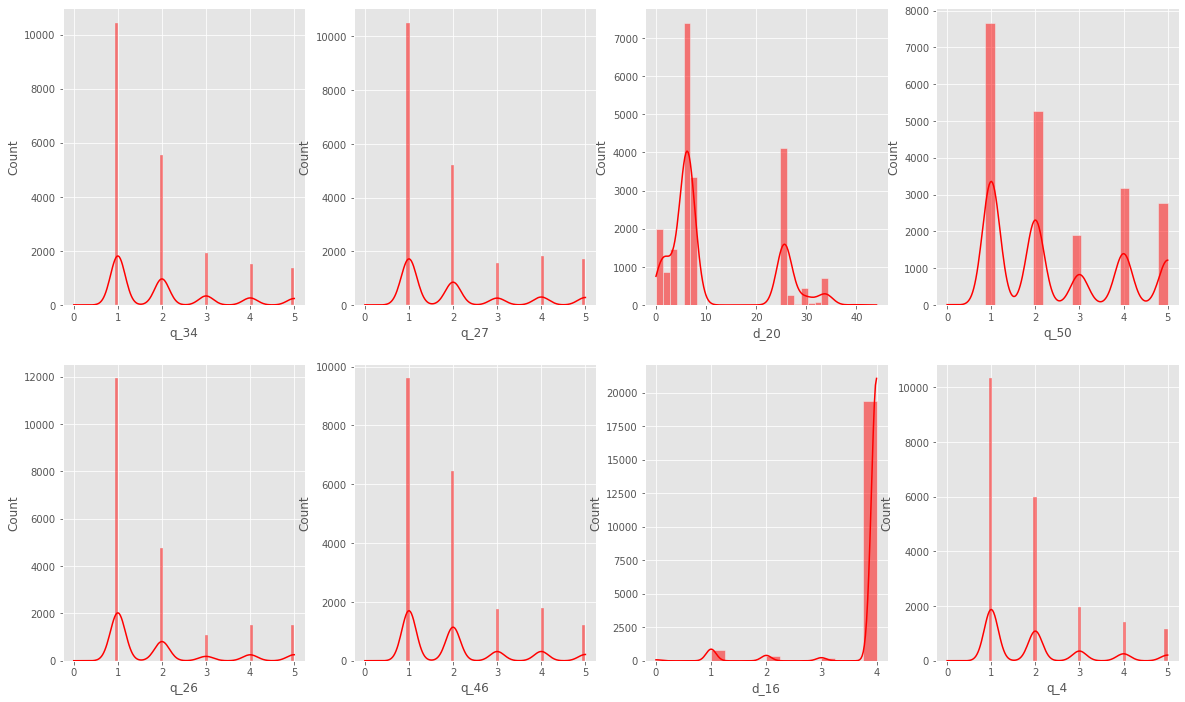

In [39]:
plt.style.use('ggplot')
plt.figure(figsize = (20, 12))

plt.subplot(2,4,1)
sns.histplot(df_final['q_34'], kde = True, color = 'red')

plt.subplot(2,4,2)
sns.histplot(df_final['q_27'], kde = True, color = 'red')

plt.subplot(2,4,3)
sns.histplot(df_final['d_20'], kde = True, color = 'red')

plt.subplot(2,4,4)
sns.histplot(df_final['q_50'], kde = True, color = 'red')

plt.subplot(2,4,5)
sns.histplot(df_final['q_26'], kde = True, color = 'red')

plt.subplot(2,4,6)
sns.histplot(df_final['q_46'], kde = True, color = 'red')

plt.subplot(2,4,7)
sns.histplot(df_final['d_16'], kde = True, color = 'red')

plt.subplot(2,4,8)
sns.histplot(df_final['q_4'], kde = True, color = 'red')

plt.show()

In [40]:
# Dropping the redundant columns
df_final = df_final.drop(['q_34', 'q_27', 'd_20', 'q_50', 'q_26', 'q_25', 'q_46', 'q_4'], axis = 1)

#### Getting the Correlation metrix

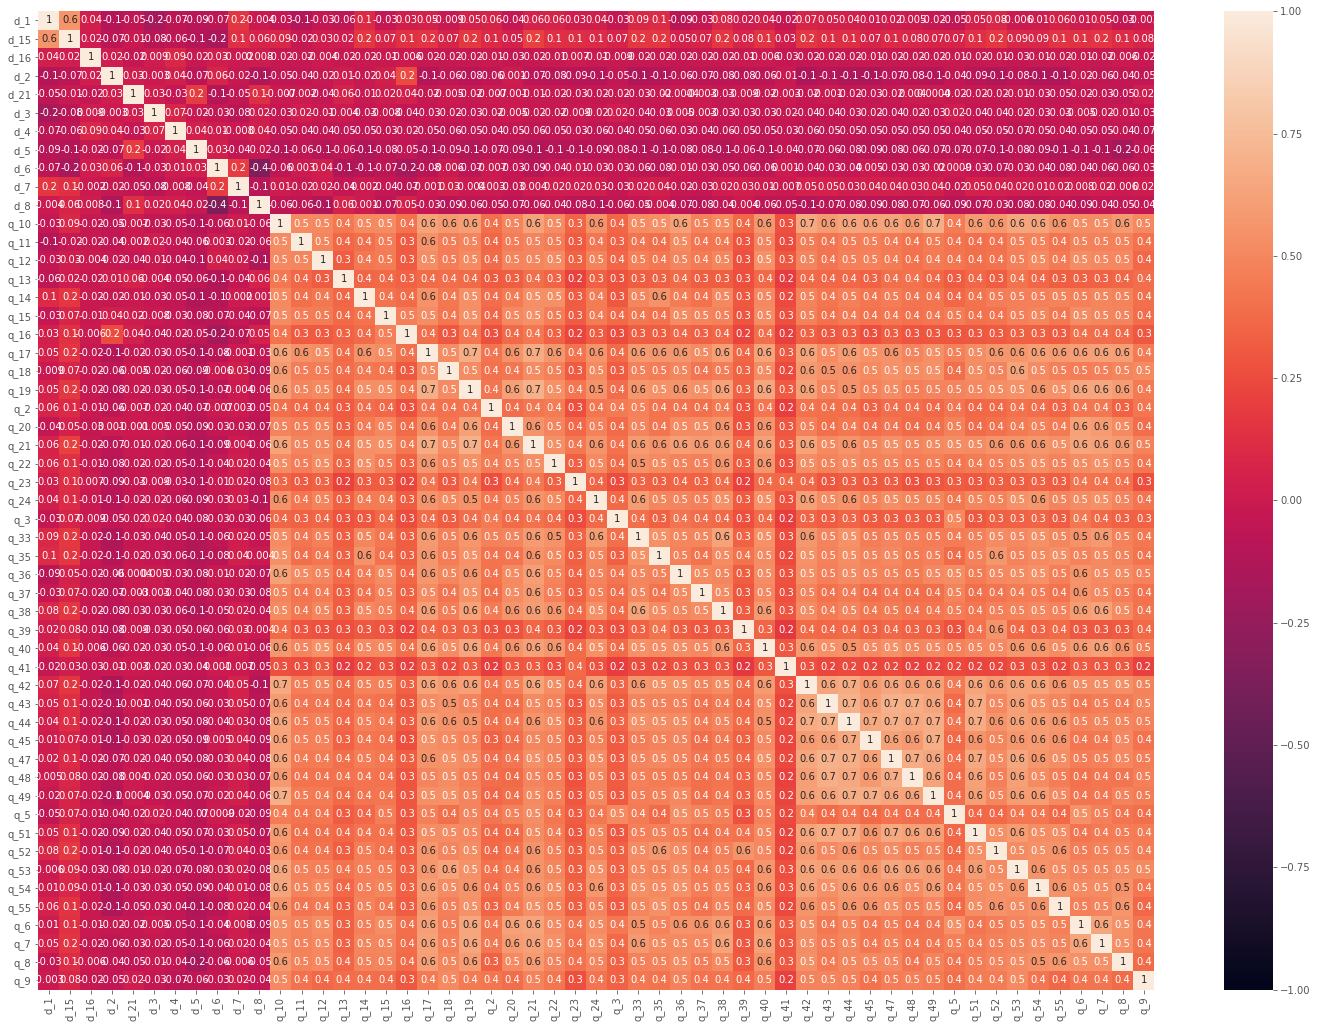

In [41]:
plt.figure(figsize=(25,18))
sns.heatmap(df_final.drop(['Intention_to_leave'], axis = 1).corr(), vmin=-1, vmax=1, annot=True, fmt='.1g')
plt.show()

- From the above Correlation heatmap we see there are no more indipendent variables which are redundent

#### Getting the Predictive Power score for all the variables

In [42]:
# plt.figure(figsize=(25,18))
# matrix_df = pps.matrix(df_final.drop(['Intention_to_leave'], axis = 1))[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="RdYlBu_r", linewidths=0.5, annot=True)
# plt.show()

- We can also see from the above PPS heatmap that there are no more indipendent variables which are redundent

### The final Dataset is ready and now it's time to train some models and do some predictions :)

In [43]:
df_final.head()

,d_1,d_15,d_16,d_2,d_21,d_3,d_4,d_5,d_6,d_7,d_8,Intention_to_leave,q_10,q_11,q_12,q_13,q_14,q_15,q_16,q_17,q_18,q_19,q_2,q_20,q_21,q_22,q_23,q_24,q_3,q_33,q_35,q_36,q_37,q_38,q_39,q_40,q_41,q_42,q_43,q_44,q_45,q_47,q_48,q_49,q_5,q_51,q_52,q_53,q_54,q_55,q_6,q_7,q_8,q_9
0,3,2,4.0,1,5.0,2.0,2.0,1.0,1,1.0,1.0,0,1,2,2,1,2,1,1,2,1,5,1,4,2,2,4,4,1,2,3,1,4,1,3,2,1,1,1,2,1,1,1,1,1,2,3,2,1,3,2,1,3,1
1,3,5,4.0,1,1.0,2.0,2.0,16.0,1,2.0,1.0,0,1,1,2,1,1,2,2,5,1,1,1,2,1,2,1,2,1,1,5,2,2,2,1,1,1,1,1,2,1,1,1,2,1,1,2,1,2,4,2,2,2,1
3,3,6,4.0,1,1.0,2.0,2.0,1.0,1,1.0,3.0,0,1,1,4,1,2,5,5,2,1,2,1,1,1,4,2,1,2,2,1,1,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,4,1
5,3,2,4.0,1,2.0,2.0,2.0,1.0,1,1.0,1.0,1,4,4,3,1,1,4,5,3,4,4,1,4,4,1,3,2,3,3,4,4,4,4,1,4,4,3,1,1,4,4,2,4,5,2,1,4,4,3,5,4,4,3
6,5,5,4.0,1,3.0,2.0,2.0,1.0,2,2.0,1.0,1,2,1,1,1,1,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,2,2,2,1,2,1,1,1,1,2,2,2,1,2,1,2


In [44]:
df_final.shape

(20826, 54)

#### Checking the distribution to point out outliers in the dataset

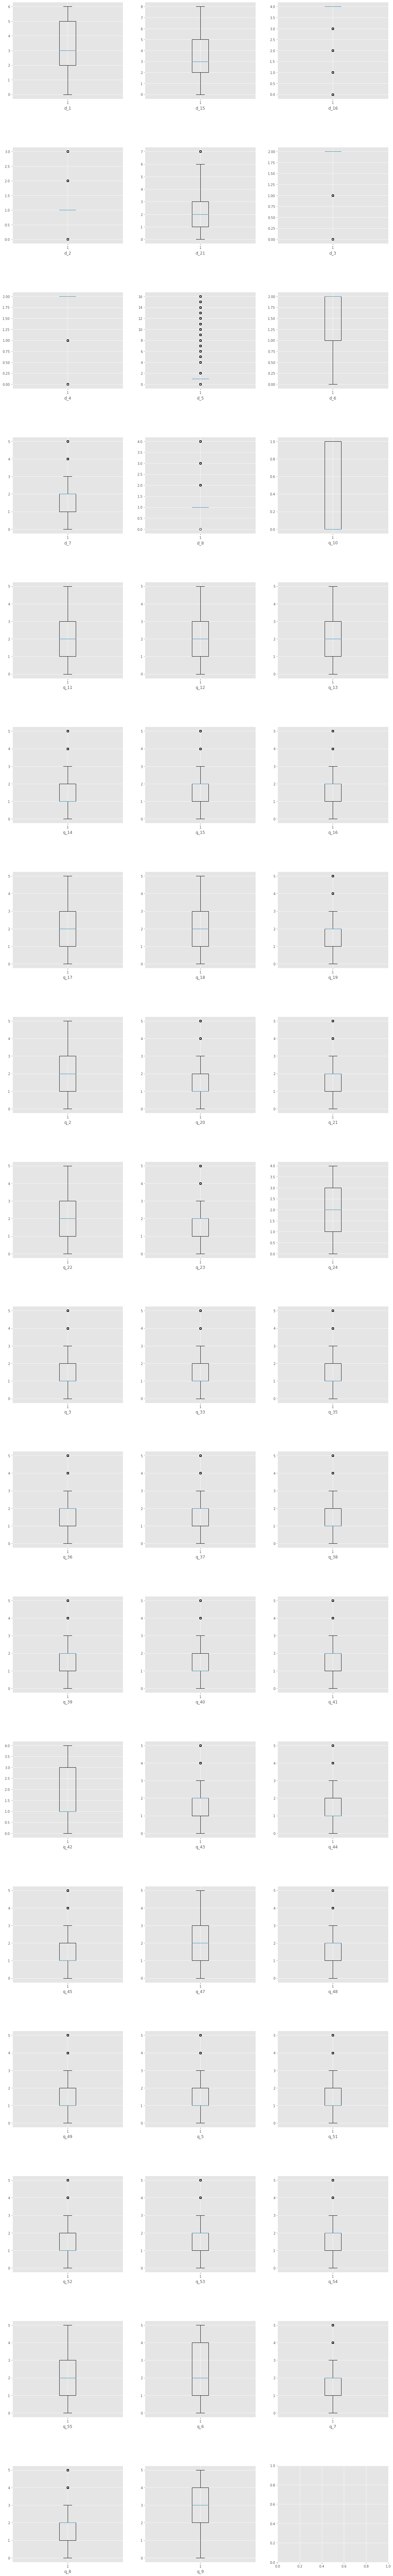

In [45]:
fig, axes = plt.subplots(18,3, figsize=(20,140))
fig.subplots_adjust(hspace=0.5)
for ax, feature, name in zip(axes.flatten(), df_final.values.T, df_final.drop(['Intention_to_leave'], axis = 1).columns):
    ax.boxplot(x  = feature)
    ax.set(title=name[:-4].upper(), xlabel= name)
plt.show()

- From the Above distribution of all the features we can see that 'd_5' has a lot of outliers in it and there are few more variables wih few outliers

In [46]:
# dropping 'd_5'
df_final = df_final.drop('d_5', axis = 1)

In [47]:
# dct = {}
# dct1 = {}
# for i in df_final.drop('Intention_to_leave', axis = 1).columns.tolist():
#     dct[i] = pps.score(df_final, i, 'Intention_to_leave', sample=5_000,
#                         cross_validation=4, random_seed=123, invalid_score=0,
#                         catch_errors=True)
# for i,j in dct.items():
#        dct1[i] = round(j['ppscore'],2)

In [48]:
#df_no_target = df_final.drop('Intention_to_leave', axis = 1)
#Q1 = df_no_target.quantile(0.25)
#Q3 = df_no_target.quantile(0.75)
#IQR = Q3 - Q1

#df_no_out = df_no_target[~((df_no_target < (Q1 - 1.5 * IQR)) |(df_no_target > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_out = df_no_target[((df_no_target < (Q1 - 1.5 * IQR)) |(df_no_target > (Q3 + 1.5 * IQR))).any(axis=1)]
#df_no_out.head()

In [49]:
#print("Actual ",df_final.shape)
#print("Excluded ", df_out.shape)
#print("Kept ", df_no_out.shape)

In [50]:
round(df_final['Intention_to_leave'].mean()*100,2)

36.3

- d_1  - Age
- d_15 - Length
- d_21 - Travel Time
- d_10 - I am the primary carer of a disabled adult (aged 18 and over)
- q_11 - I have a clear idea of my possible career opportunities in Sainsbury's
- q_13 - I have enough flexibility about my working hours to allow me to balance my commitments outside of work
- q_15 - I really value the benefits I receive
- q_16 - I think I am fairly paid for what I do
- q_17 - I think Sainsbury's is doing a good job of developing colleagues to be the best they can be
- q_19 - I trust Sainsbury's to do the right thing for colleagues
- q_20 - I trust Sainsbury's to do the right thing for the world we live in
- q_21 - I would tell my friends and family that Sainsbury's Bank is a great place to work
- q_23 - Looking ahead over the next 12 months, I think Sainsbury's will Change for the Better
- q_36 - My work gives me a sense of achievement
- q_6  - I believe in Sainsbury's vision and goal
- q_8  - I believe things will change as a result of this survey
- q_10 - I feel valued for the work that I do
- q_37 - Sainsbury's Bank provides great products at fair prices,

In [51]:
df_final.rename(columns = {'d_1':'age', 'd_15':'length', 'd_21':'travel_time', 'd_10':'primary_carer', 
                         'q_11':'clear_idea_career_opportunities',
                         'q_13':'flexibility_of_working_hours', 'q_15':'value_benefits_I_receive', 
                         'q_16':'fairly_paid', 'q_17':'good_job_of_developing_colleagues',
                         'q_19':'trust_to_do_the_right_thing_colleagues', 'q_20':'trust_to_do_the_right_thing_world', 
                         'q_21':'is_a_grate_bank', 'q_23':'will_change_for_the_better',
                         'q_36':'sense_of_achievement', 'q_6':'believe_in_vision_and_goal', 
                         'q_8':'things_will_change_based_on_survey',
                         'q_10':'feel_valued_for_the_work_I_do', 'q_37':'provides_products_at_fair_prices'}, 
                inplace= True)

df_final.head()

,age,length,d_16,d_2,travel_time,d_3,d_4,d_6,d_7,d_8,Intention_to_leave,feel_valued_for_the_work_I_do,clear_idea_career_opportunities,q_12,flexibility_of_working_hours,q_14,value_benefits_I_receive,fairly_paid,good_job_of_developing_colleagues,q_18,trust_to_do_the_right_thing_colleagues,q_2,trust_to_do_the_right_thing_world,is_a_grate_bank,q_22,will_change_for_the_better,q_24,q_3,q_33,q_35,sense_of_achievement,provides_products_at_fair_prices,q_38,q_39,q_40,q_41,q_42,q_43,q_44,q_45,q_47,q_48,q_49,q_5,q_51,q_52,q_53,q_54,q_55,believe_in_vision_and_goal,q_7,things_will_change_based_on_survey,q_9
0,3,2,4.0,1,5.0,2.0,2.0,1,1.0,1.0,0,1,2,2,1,2,1,1,2,1,5,1,4,2,2,4,4,1,2,3,1,4,1,3,2,1,1,1,2,1,1,1,1,1,2,3,2,1,3,2,1,3,1
1,3,5,4.0,1,1.0,2.0,2.0,1,2.0,1.0,0,1,1,2,1,1,2,2,5,1,1,1,2,1,2,1,2,1,1,5,2,2,2,1,1,1,1,1,2,1,1,1,2,1,1,2,1,2,4,2,2,2,1
3,3,6,4.0,1,1.0,2.0,2.0,1,1.0,3.0,0,1,1,4,1,2,5,5,2,1,2,1,1,1,4,2,1,2,2,1,1,2,2,1,2,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,4,1
5,3,2,4.0,1,2.0,2.0,2.0,1,1.0,1.0,1,4,4,3,1,1,4,5,3,4,4,1,4,4,1,3,2,3,3,4,4,4,4,1,4,4,3,1,1,4,4,2,4,5,2,1,4,4,3,5,4,4,3
6,5,5,4.0,1,3.0,2.0,2.0,2,2.0,1.0,1,2,1,1,1,1,2,1,2,1,2,1,1,1,2,1,1,1,1,1,1,1,1,1,2,2,1,2,2,2,1,2,1,1,1,1,2,2,2,1,2,1,2


In [52]:
df_final = df_final[df_final['age']!=0]

In [53]:
df_final = df_final[df_final['is_a_grate_bank']!=0]

In [54]:
df_final = df_final[df_final['sense_of_achievement']!=0]

- We have a <html><b><font color = 'Red'>36.3%</font></b></html>. churn rate which is unchanged after data imputation

In [55]:
# building test and train Dataset
from sklearn.model_selection import train_test_split
X = df_final.drop(['Intention_to_leave'], axis=1)
y = df_final['Intention_to_leave']

In [56]:
# Splitting the data into train and test
x_train, x_cv, y_train, y_cv = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)
sel.get_support()
selected_feat= x_train.columns[(sel.get_support())]
selected_feat = list(selected_feat)

In [58]:
print(len(selected_feat))

16


In [59]:
selected_feat

['age',
 'length',
 'travel_time',
 'feel_valued_for_the_work_I_do',
 'clear_idea_career_opportunities',
 'flexibility_of_working_hours',
 'value_benefits_I_receive',
 'fairly_paid',
 'good_job_of_developing_colleagues',
 'trust_to_do_the_right_thing_colleagues',
 'is_a_grate_bank',
 'will_change_for_the_better',
 'sense_of_achievement',
 'q_40',
 'believe_in_vision_and_goal',
 'things_will_change_based_on_survey']

In [60]:
parameters ={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}

In [61]:
# %%time
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# grid_search = RandomForestClassifier()
# grid_search = GridSearchCV(
#     grid_search, 
#     parameters, 
#     cv=5,
#     scoring='accuracy',n_jobs=-1)

# model= grid_search.fit(x_train, y_train)
# print('Best Params: ', model.best_params_)
# print('Best Score: ', model.best_score_)

In [62]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  StratifiedKFold

random_for = RandomForestClassifier()
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
rmf = RandomizedSearchCV(random_for, param_distributions=parameters, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

model = rmf.fit(x_train, y_train)
print('Best Params: ', model.best_params_)
print('Best Score: ', model.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 0.3, 'max_depth': 50}
Best Score:  0.8230520687369441
CPU times: user 9.18 s, sys: 145 ms, total: 9.32 s
Wall time: 38.9 s


In [63]:
from sklearn.ensemble import RandomForestClassifier
rmf1 = RandomForestClassifier(n_estimators= 400, min_samples_split= 10,
                              min_samples_leaf= 3, max_features= 0.3, max_depth= 50, random_state=100)

In [64]:
model = rmf1.fit(x_train[selected_feat], y_train)

In [65]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(rmf1, x_train[selected_feat], y_train)
sorted_idx = rmf1.feature_importances_.argsort()

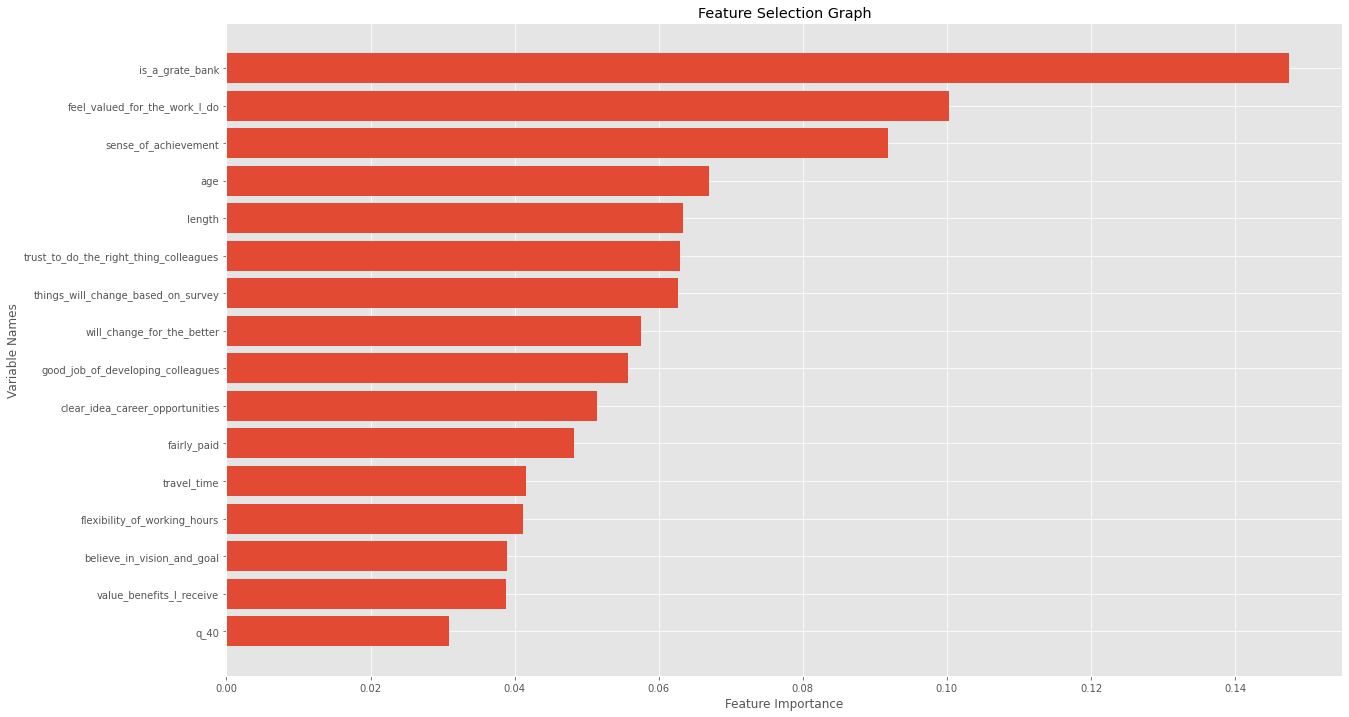

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.barh(x_train[selected_feat].columns[sorted_idx], rmf1.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Variable Names")
plt.title("Feature Selection Graph")
plt.show();

#### Top four Computing Features are:

- is_a_grate_bank
- sense_of_achievement
- feel_valued_for_the_work_I_do
- age


In [67]:
topfet = ['is_a_grate_bank', 'sense_of_achievement', 'feel_valued_for_the_work_I_do', 'age']

In [68]:
for i in x_train[topfet].columns.to_list():
    print(x_train[topfet][i].value_counts(),'\n')

1    6316
2    4347
4    1358
3    1349
5    1137
Name: is_a_grate_bank, dtype: int64 

1    6484
2    4665
4    1314
3    1100
5     944
Name: sense_of_achievement, dtype: int64 

1    6074
2    4265
4    1749
5    1397
3    1022
Name: feel_valued_for_the_work_I_do, dtype: int64 

2    3516
5    3445
3    3376
4    2312
6    1006
1     852
Name: age, dtype: int64 



## Rebuilding the model with top four contributing features:

In [69]:
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  StratifiedKFold

random_for = RandomForestClassifier()
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)
rmf = RandomizedSearchCV(random_for, param_distributions=parameters, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=4, cv=skf.split(x_train,y_train), verbose=3, random_state=1001 )

model = rmf.fit(x_train[topfet], y_train)
print('Best Params: ', model.best_params_)
print('Best Score: ', model.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Params:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 15, 'max_features': 0.9, 'max_depth': 10}
Best Score:  0.7998040840026811
CPU times: user 444 ms, sys: 15.1 ms, total: 460 ms
Wall time: 4.32 s


In [70]:
from sklearn.ensemble import RandomForestClassifier
rmf1 = RandomForestClassifier(n_estimators= 100, min_samples_split= 2,
                              min_samples_leaf= 15, max_features= 0.9, max_depth= 10, random_state=100)

In [71]:
model = rmf1.fit(x_train[topfet], y_train)

In [72]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv[topfet])
accuracy_score(y_cv,pred_cv)

0.7576391122547443

In [73]:
pred_train = model.predict(x_train[topfet])
accuracy_score(y_train,pred_train)

0.7648031984559178

In [74]:
pd.set_option('display.max_columns', None)
x_train[topfet].head()

,is_a_grate_bank,sense_of_achievement,feel_valued_for_the_work_I_do,age
12819,1,2,2,2
22820,5,5,5,3
10362,1,1,1,4
20713,1,1,2,2
23011,2,2,2,5


In [75]:
x_train[topfet].shape

(14507, 4)

In [76]:
x_train[topfet].columns.to_list()

['is_a_grate_bank',
 'sense_of_achievement',
 'feel_valued_for_the_work_I_do',
 'age']

In [77]:
# saving the model 
import pickle 
pickle_out = open("classifier1.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()